In [1]:
import warnings

import dask
import ncar_jobqueue
import yaml

import utils

%matplotlib inline

In [2]:
with open("diag_metadata.yaml", mode="r") as fptr:
    diag_metadata_list = yaml.safe_load(fptr)

# varnames = utils.get_varnames_from_metadata_list(diag_metadata_list)

In [3]:
def summary_plots(ds, diag_metadata):
    varname = diag_metadata["varname"]
    print(varname)
    da = ds[varname].isel(diag_metadata.get("isel_dict"))

    utils.summary_plot_global_ts(ds, da, diag_metadata, time_coarsen_len=12)

    utils.summary_plot_histogram(da, diag_metadata)

In [4]:
cluster = ncar_jobqueue.NCARCluster(
    cores=2, memory="64 GB", processes=2, walltime="6:00:00"
)
cluster.scale(n=8)  # n = number of workers
print(f"dashboard_link={cluster.dashboard_link}")

dashboard_link=https://jupyterhub.ucar.edu/dav/user/mlevy/proxy/34021/status


/glade/work/mlevy/miniconda3/envs/hires-marbl/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
POC_FLUX_100m


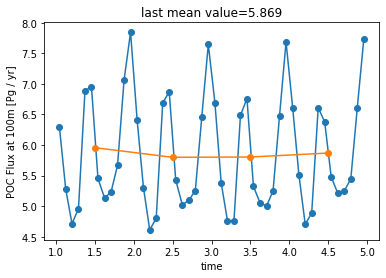

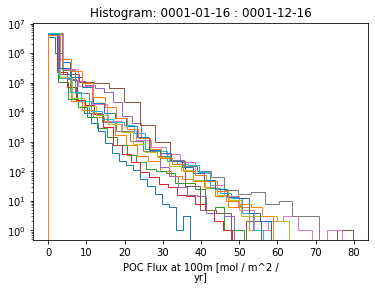

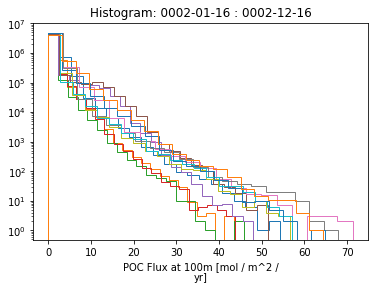

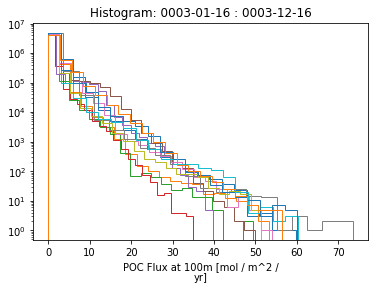

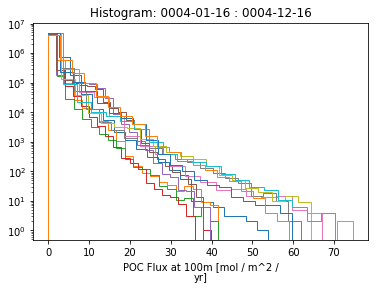

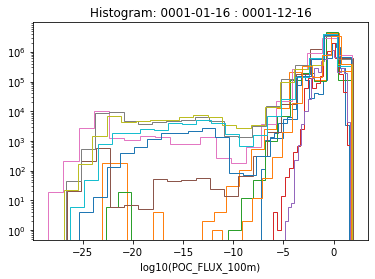

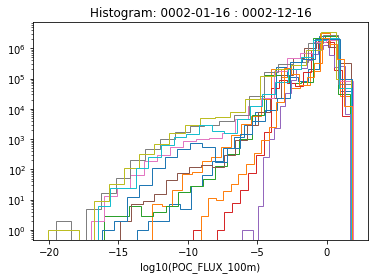

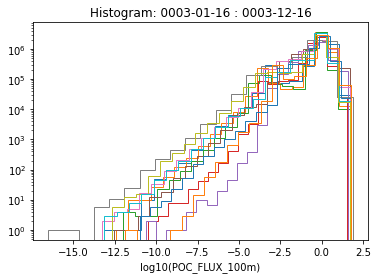

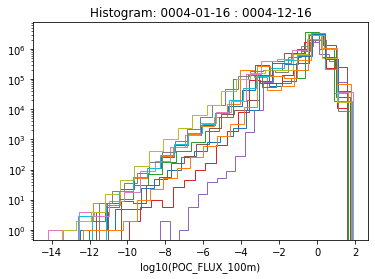

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
CaCO3_FLUX_100m


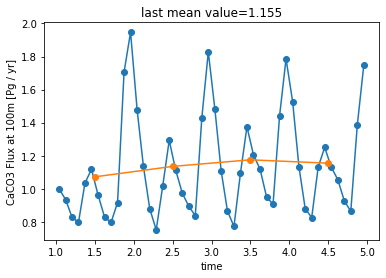

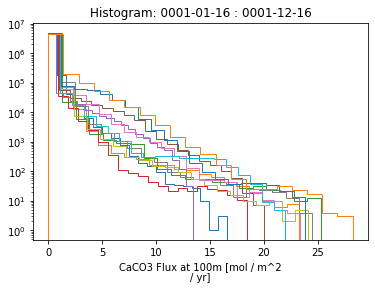

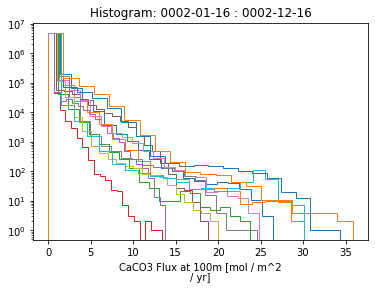

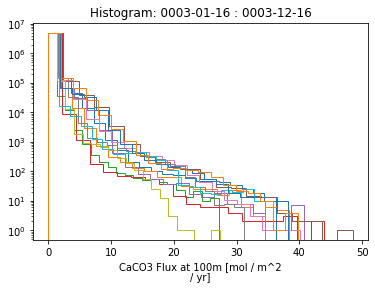

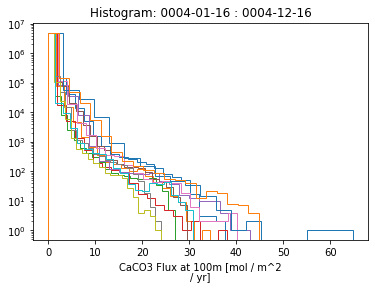

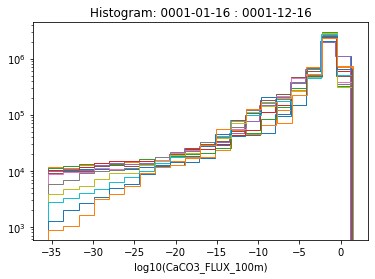

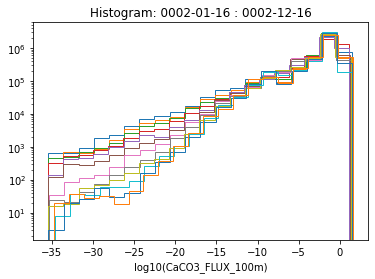

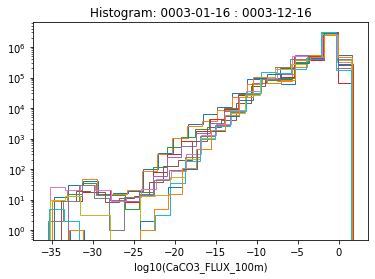

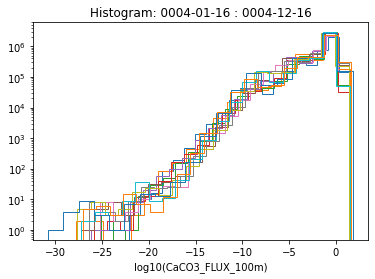

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
FG_CO2


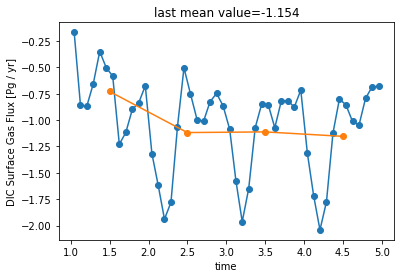

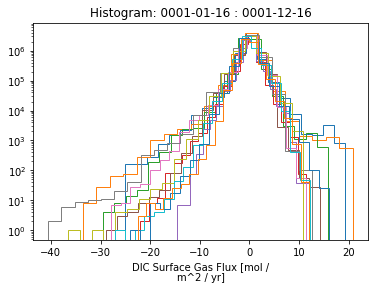

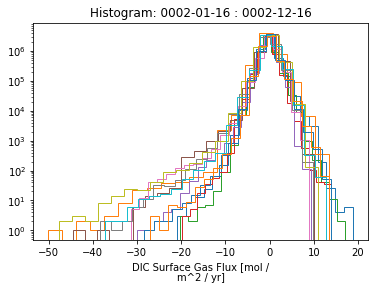

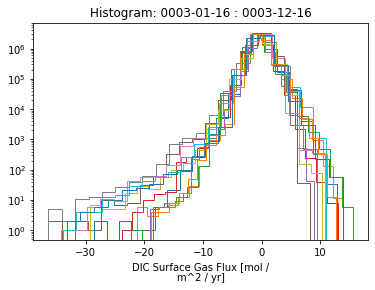

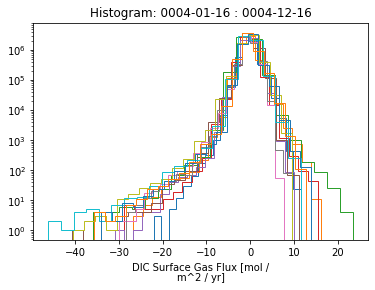

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
DpCO2


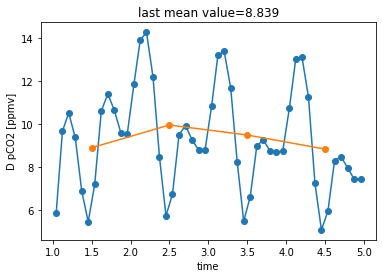

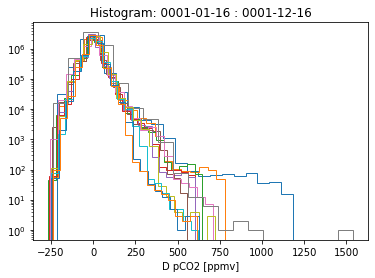

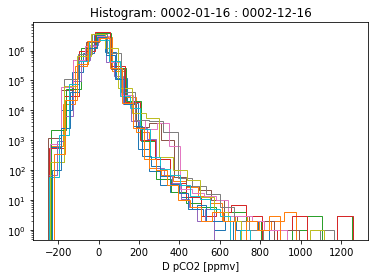

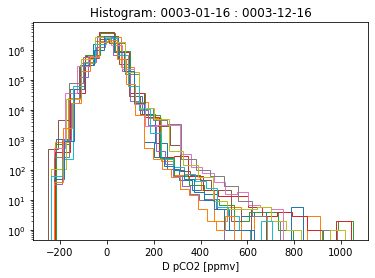

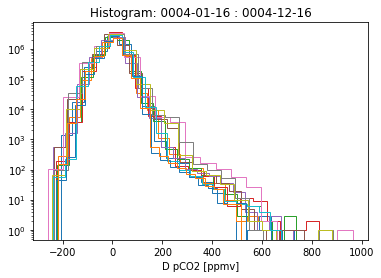

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
PH


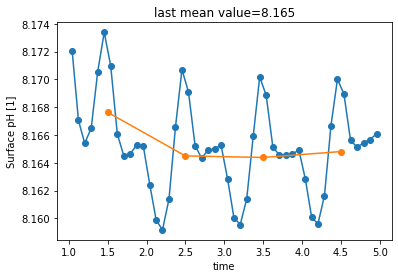

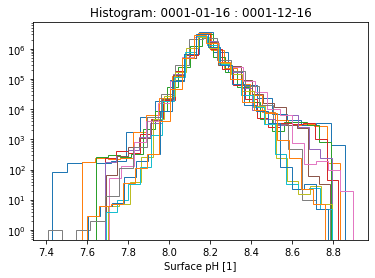

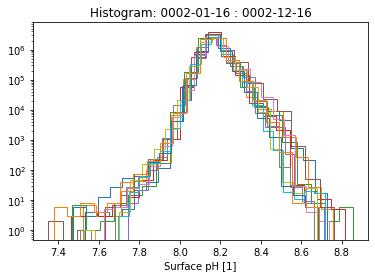

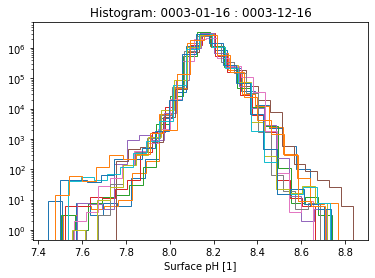

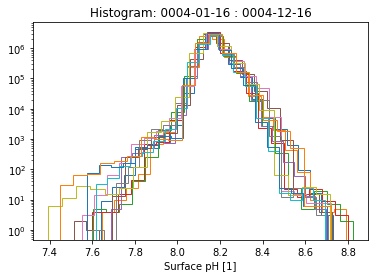

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
spChl


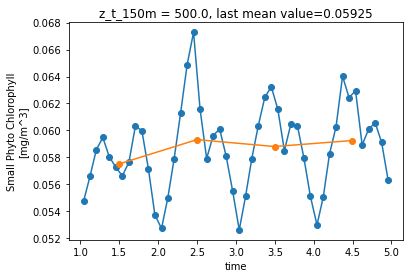

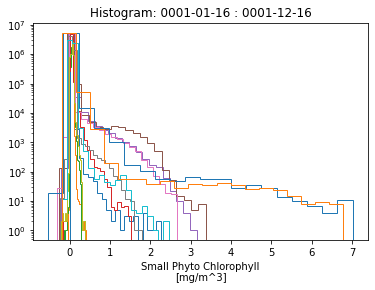

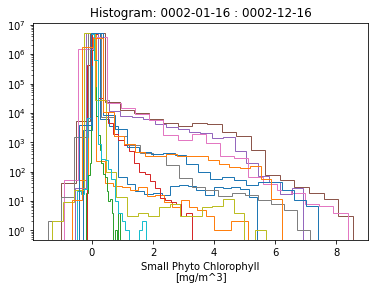

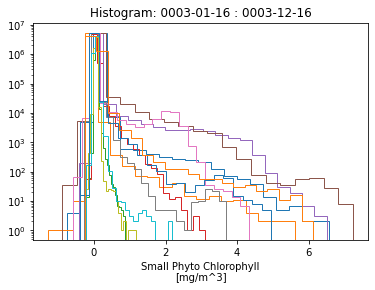

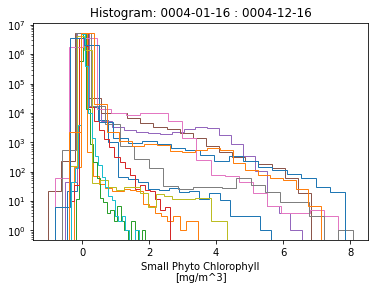

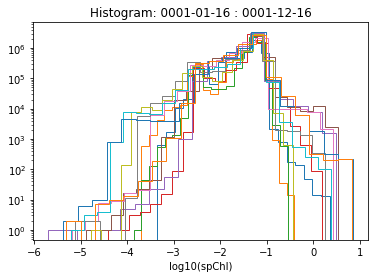

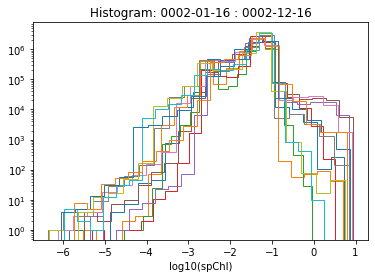

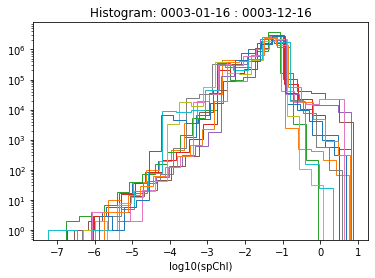

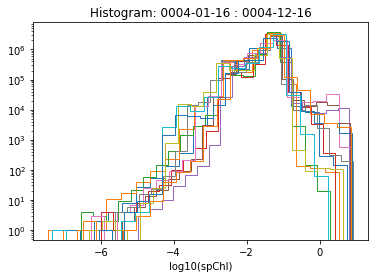

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
photoC_sp_zint


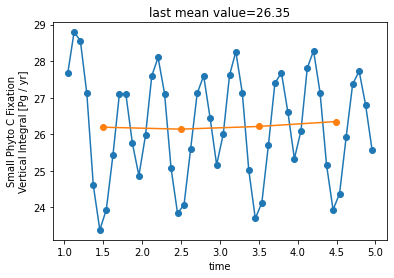

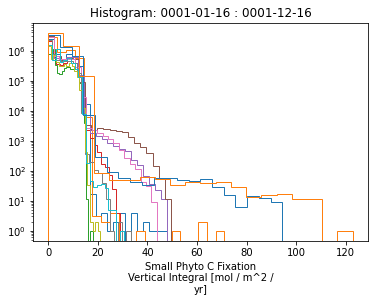

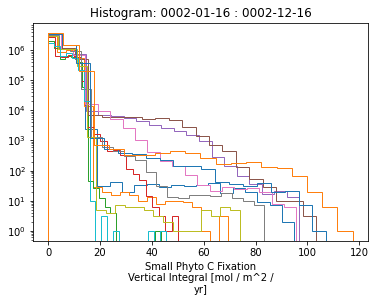

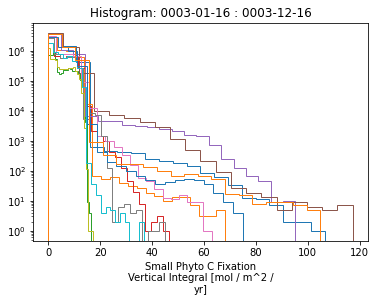

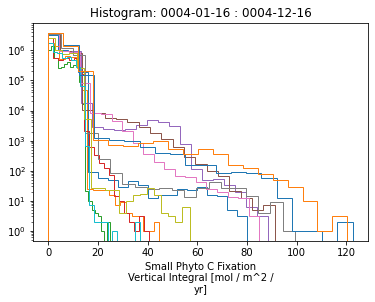

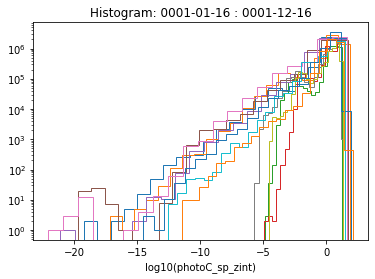

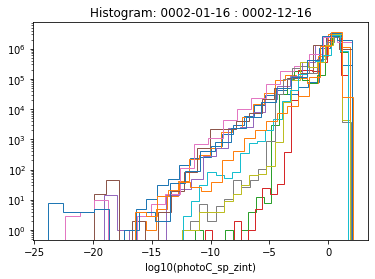

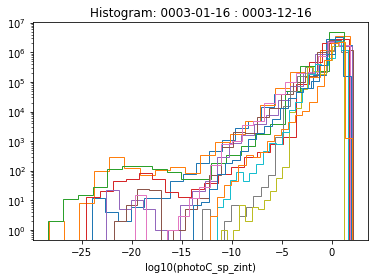

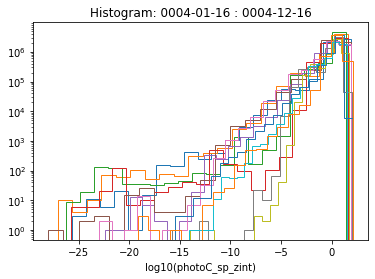

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
coccoChl


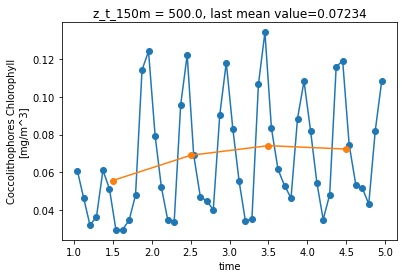

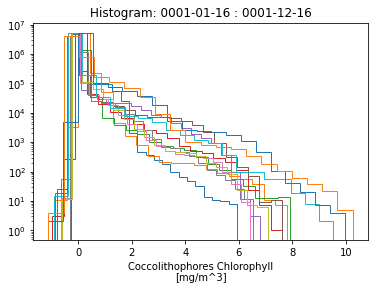

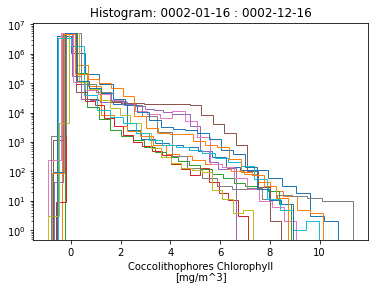

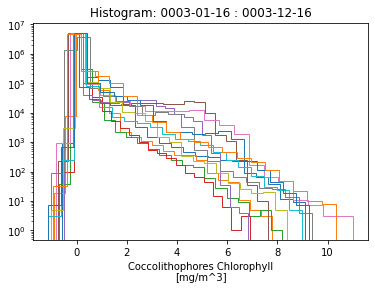

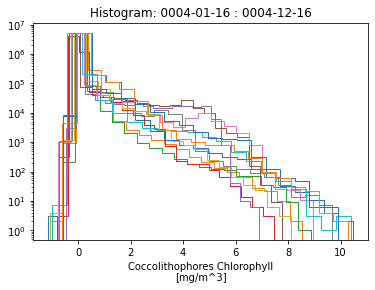

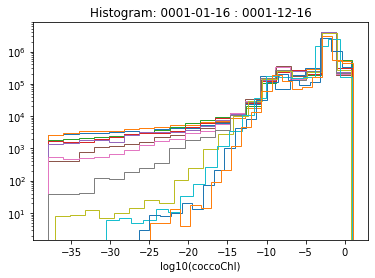

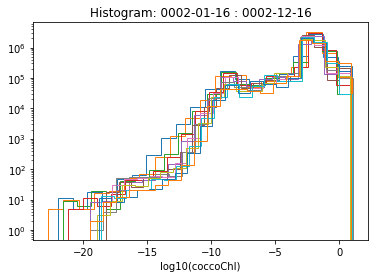

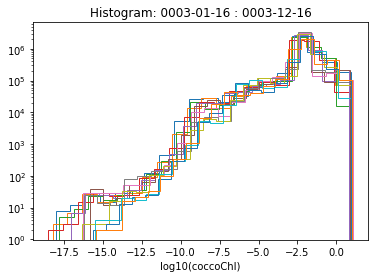

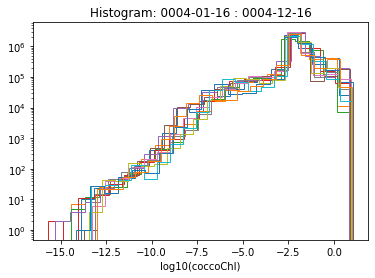

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
photoC_cocco_zint


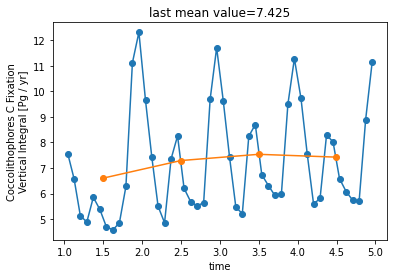

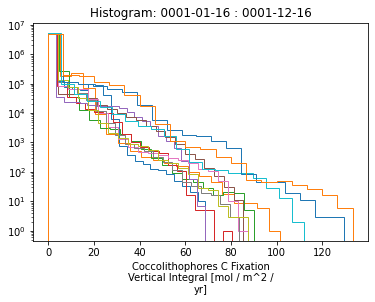

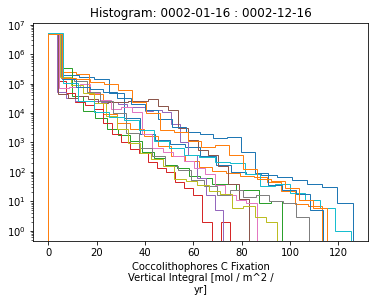

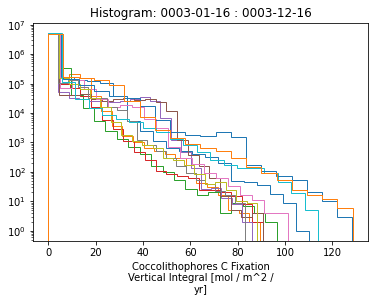

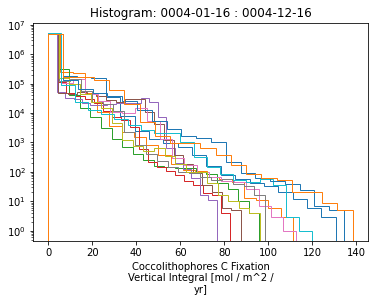

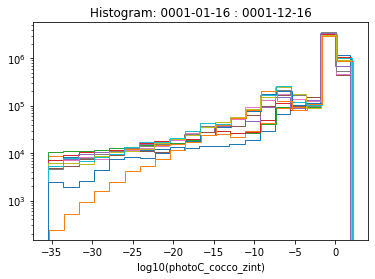

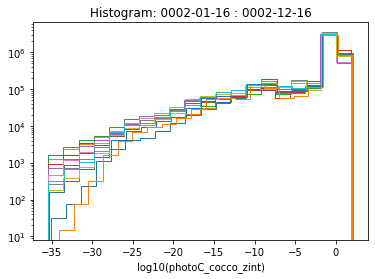

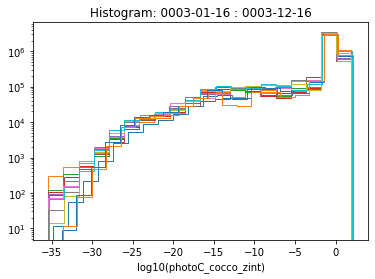

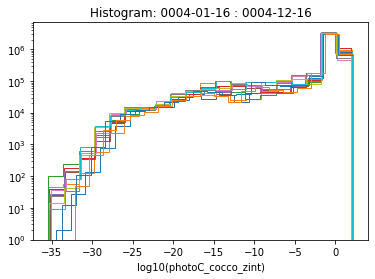

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
diatChl


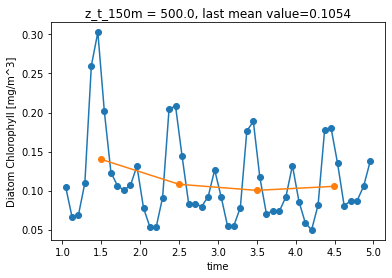

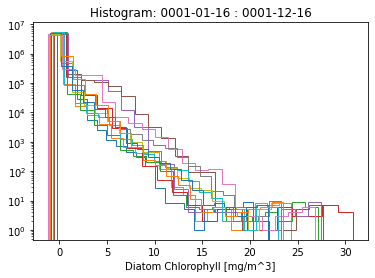

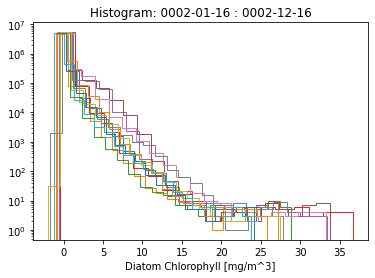

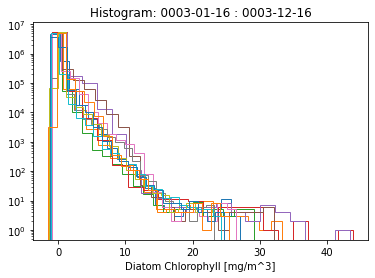

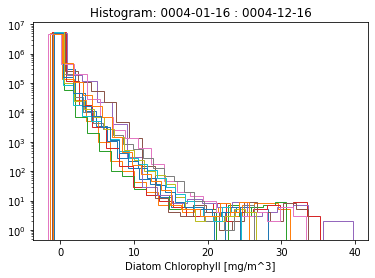

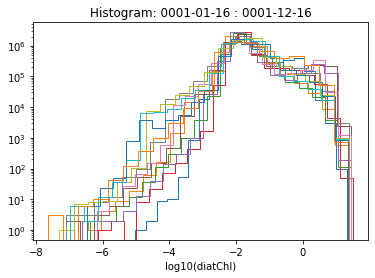

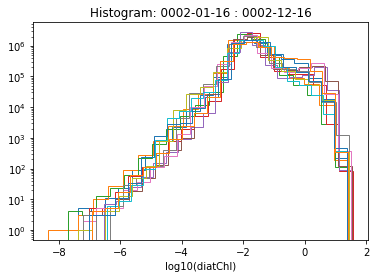

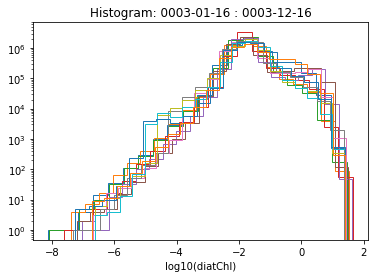

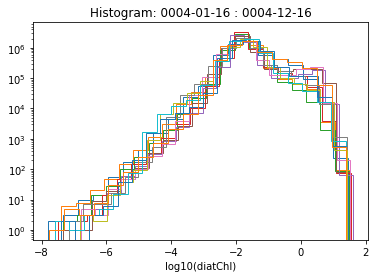

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
photoC_diat_zint


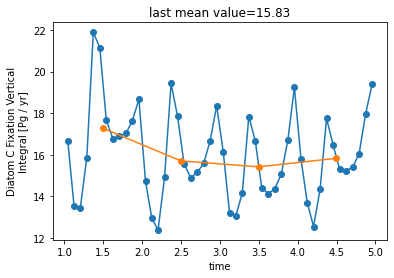

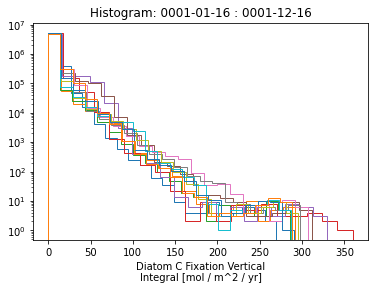

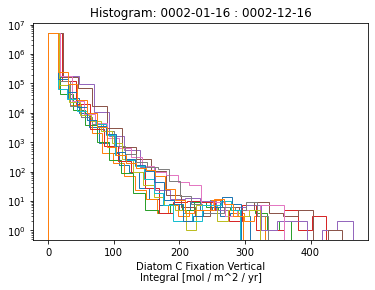

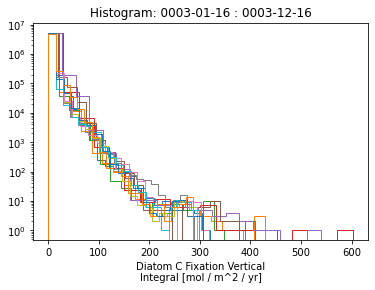

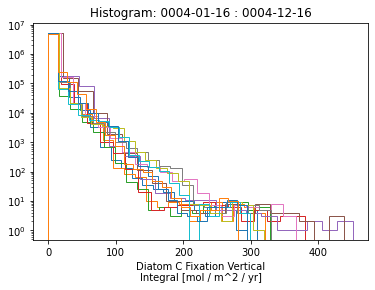

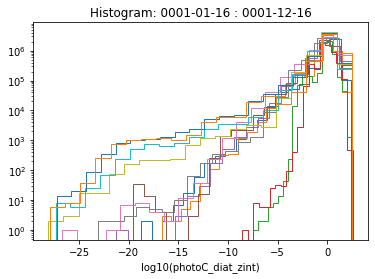

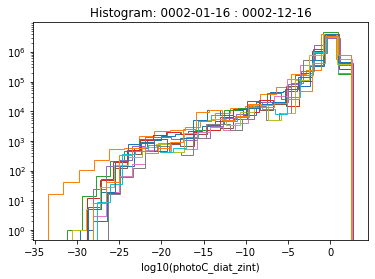

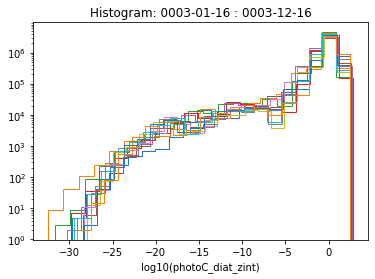

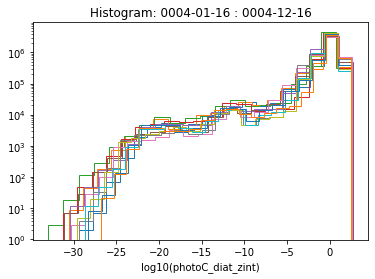

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
diazChl


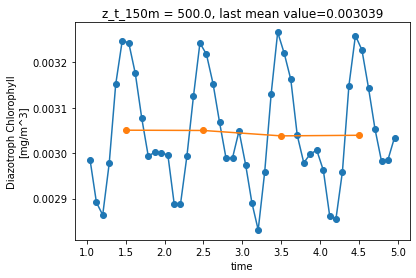

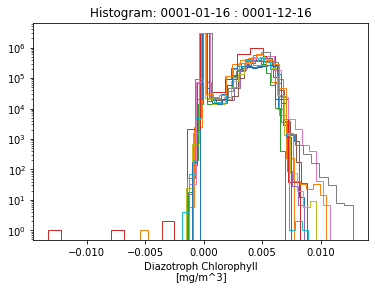

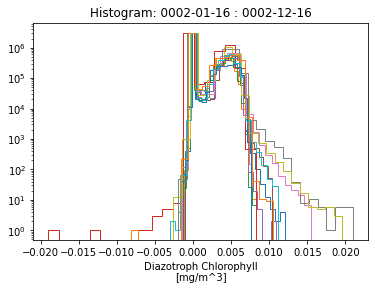

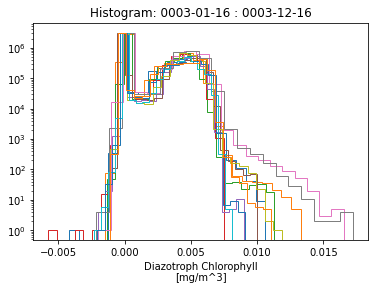

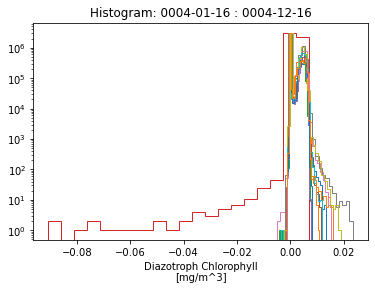

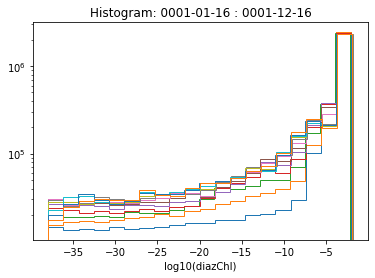

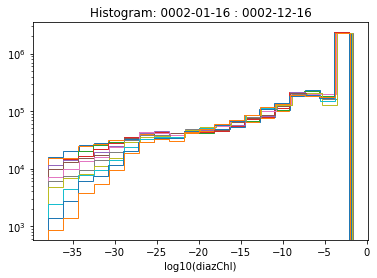

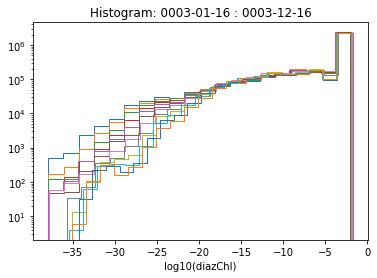

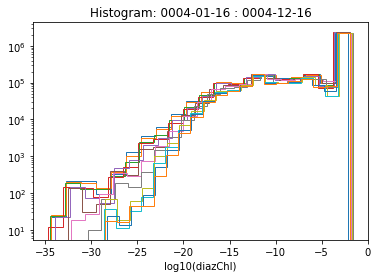

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
photoC_diaz_zint


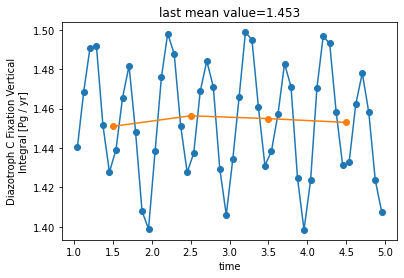

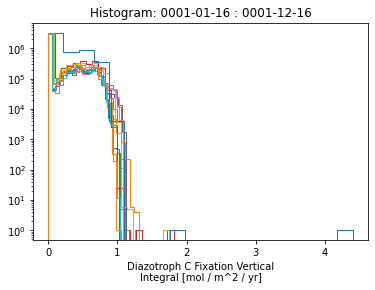

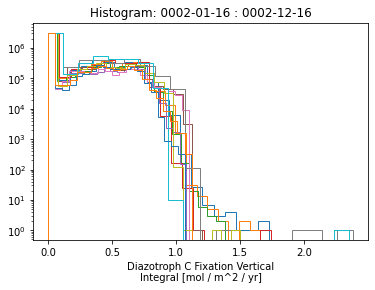

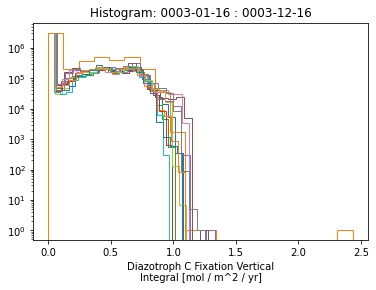

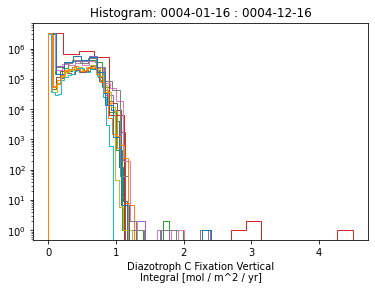

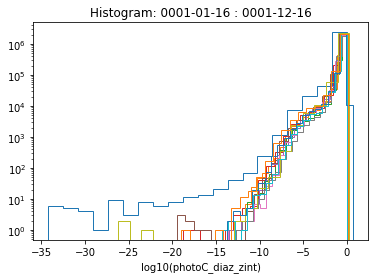

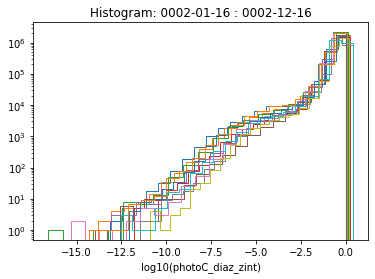

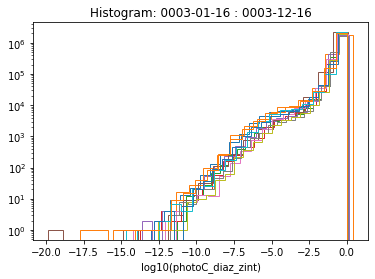

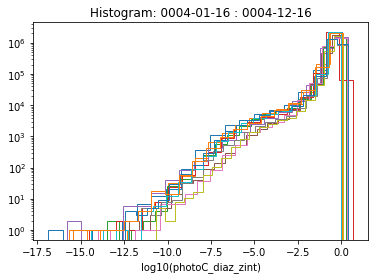

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
NHx_SURFACE_EMIS


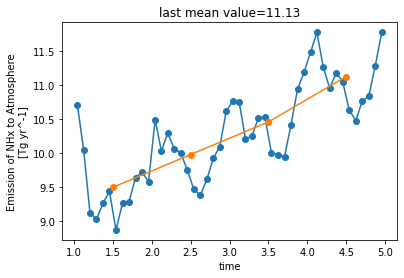

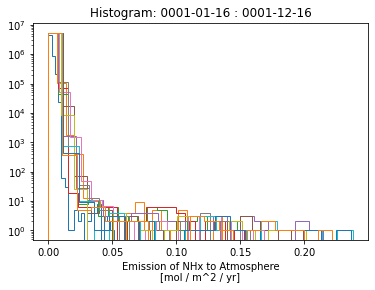

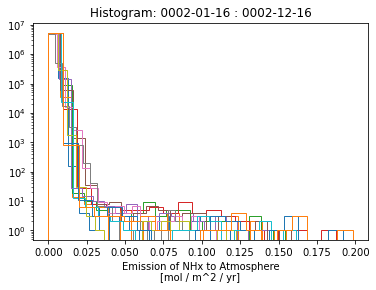

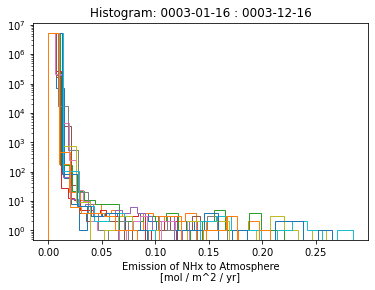

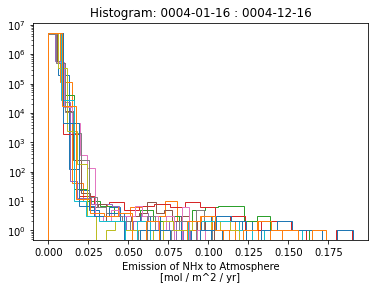

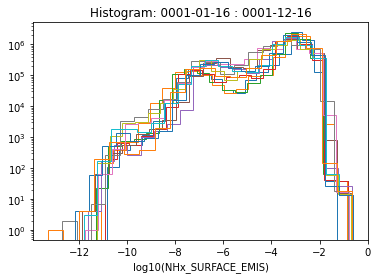

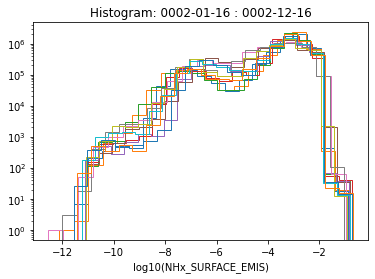

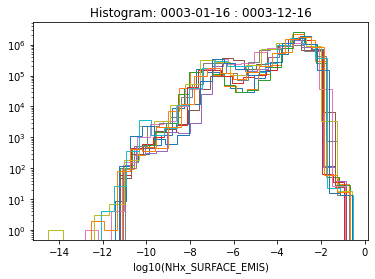

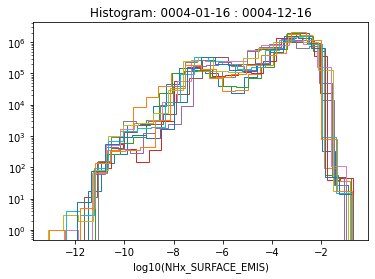

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
NH4


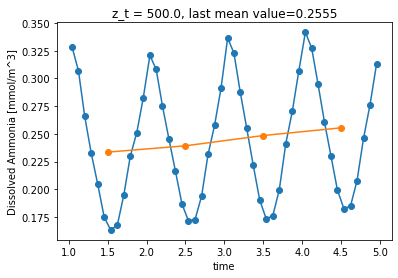

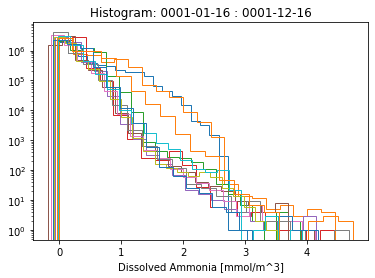

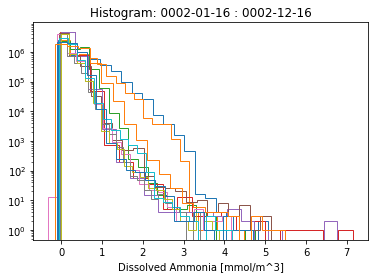

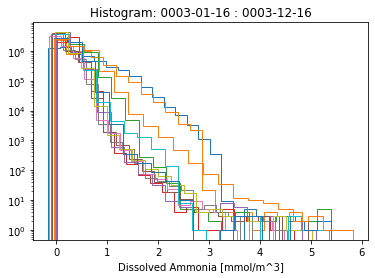

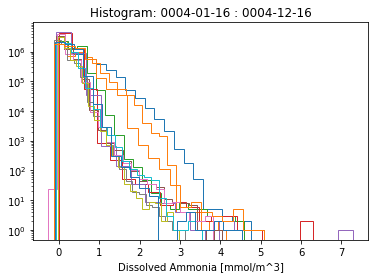

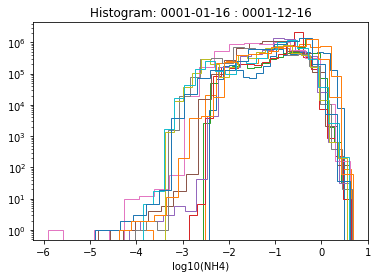

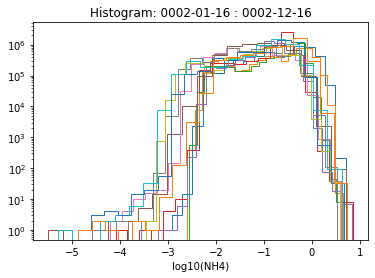

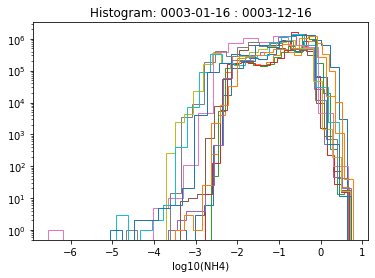

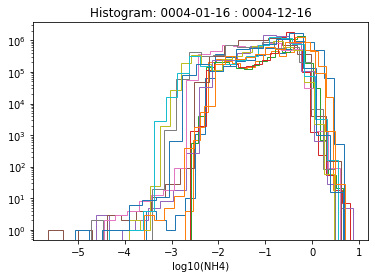

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
O2_ZMIN


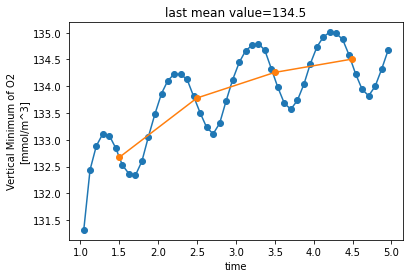

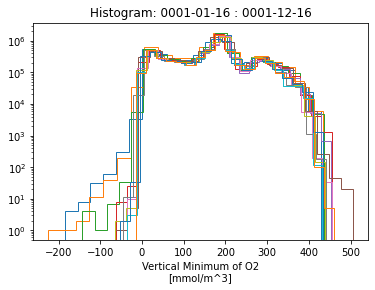

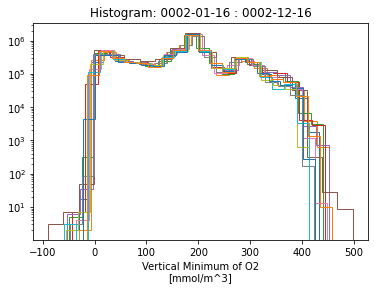

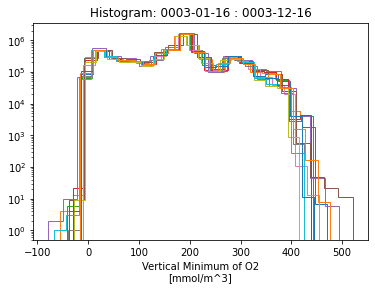

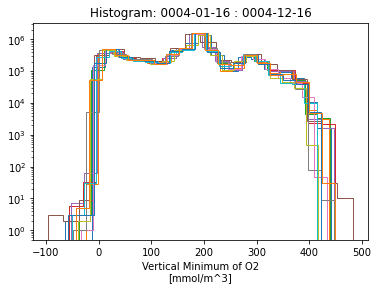

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
O2_ZMIN_DEPTH


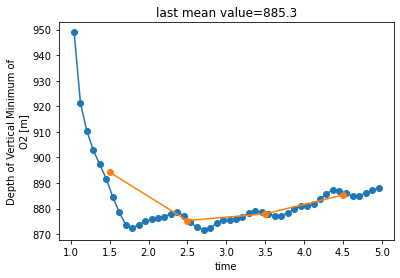

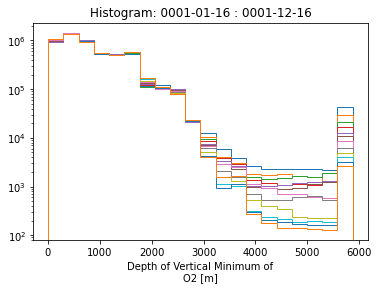

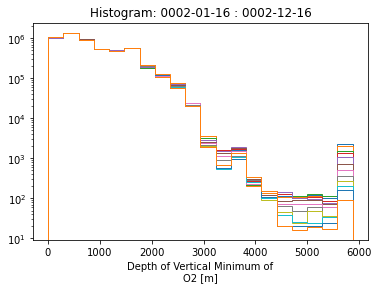

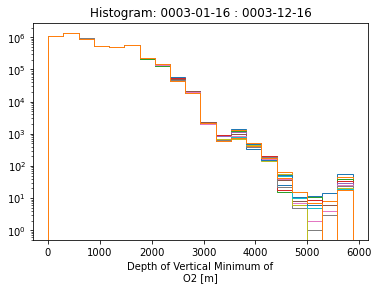

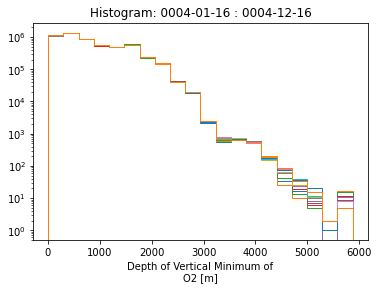

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
O2


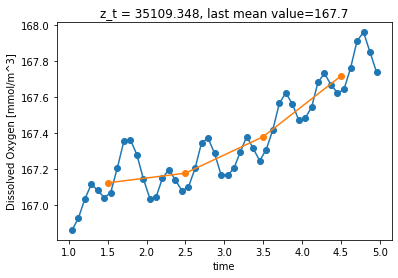

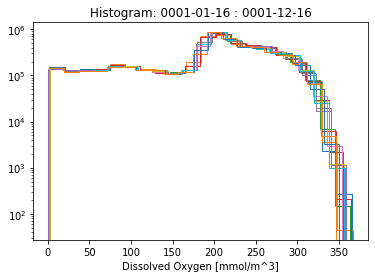

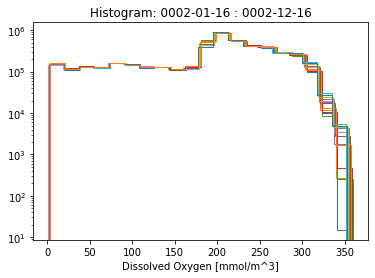

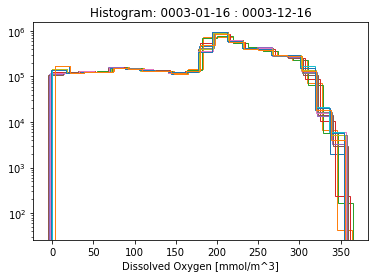

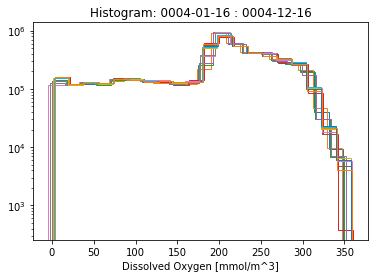

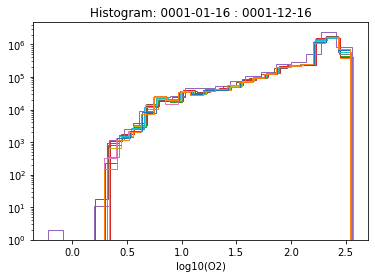

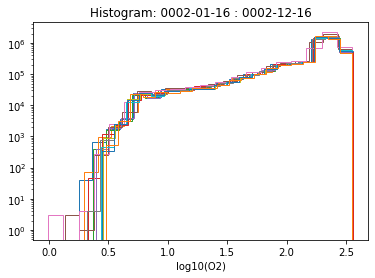

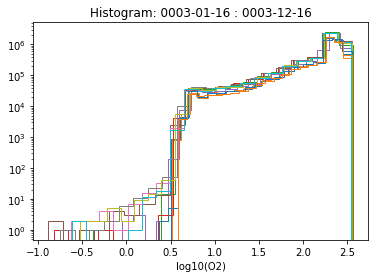

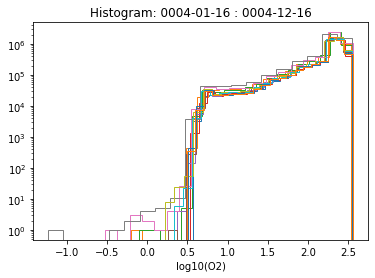

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
PO4


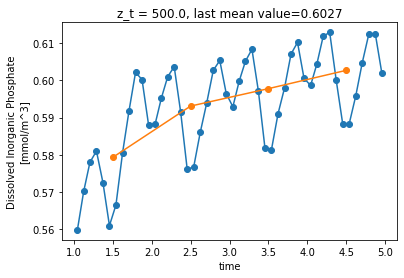

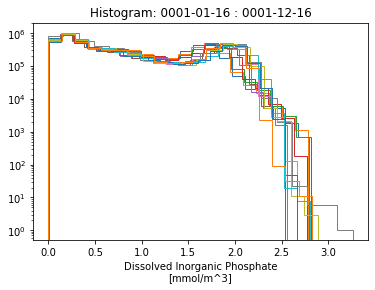

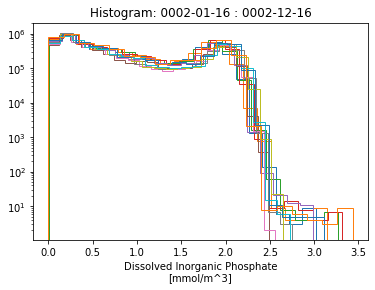

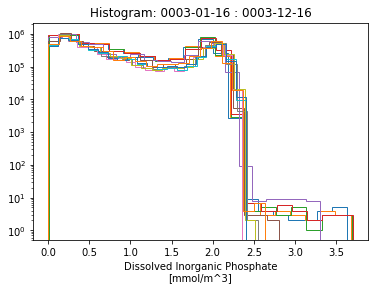

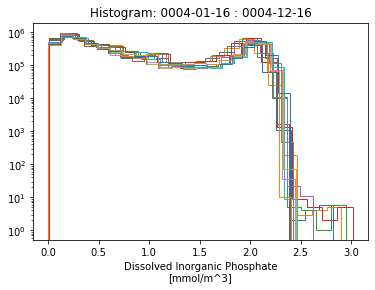

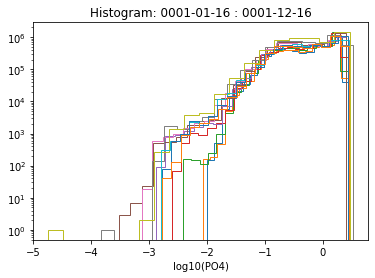

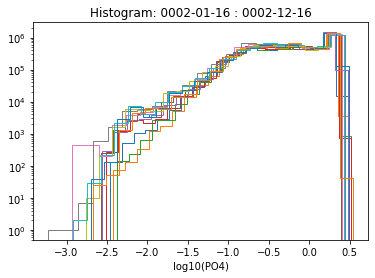

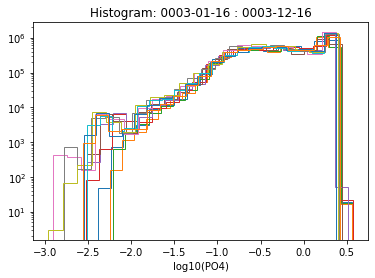

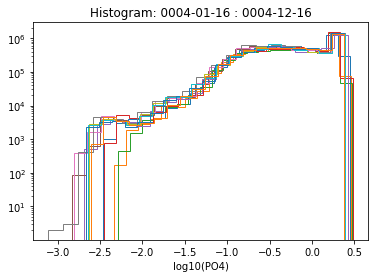

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
PO4


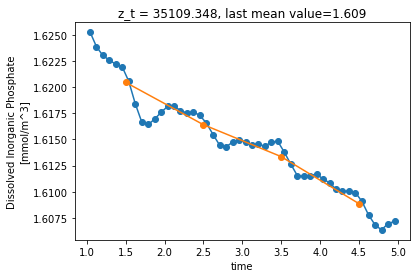

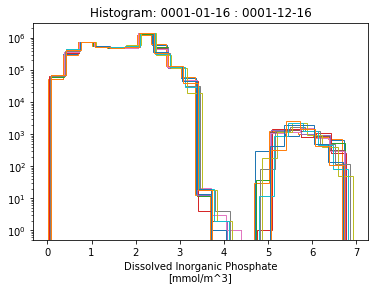

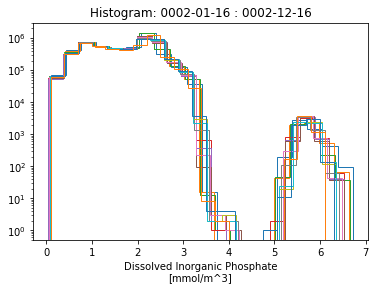

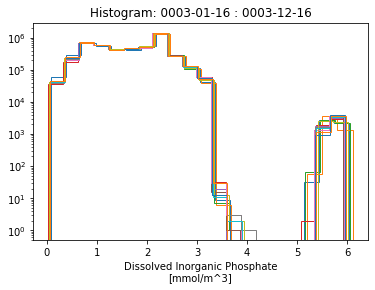

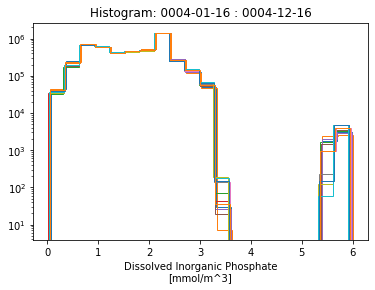

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
NO3


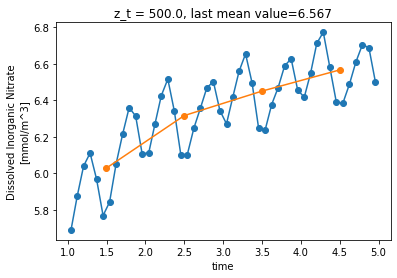

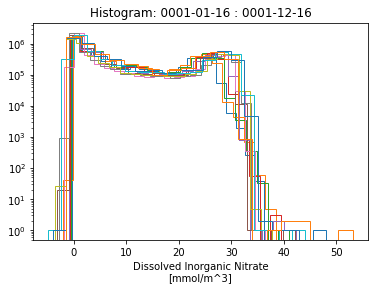

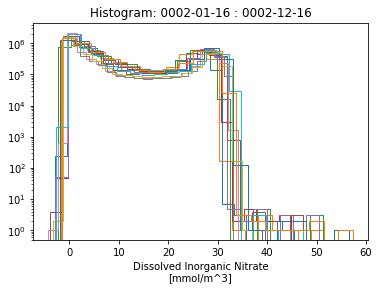

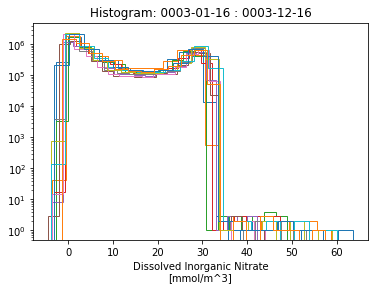

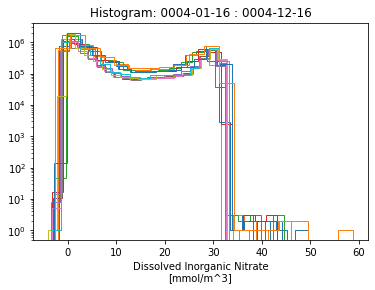

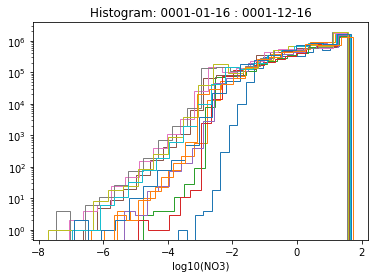

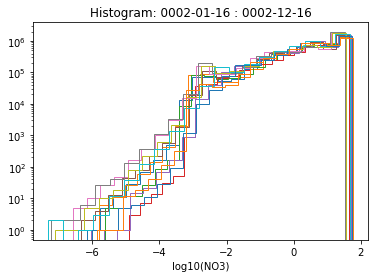

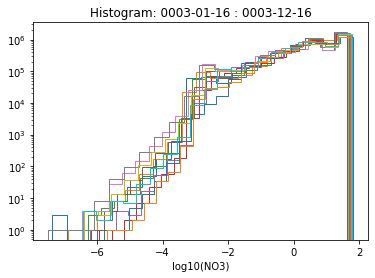

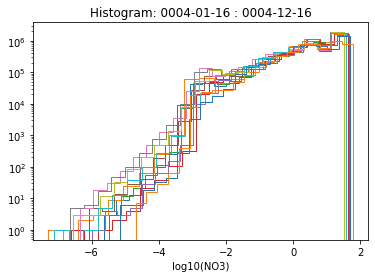

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
NO3


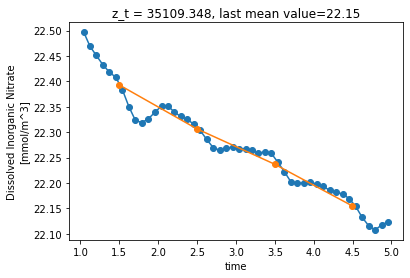

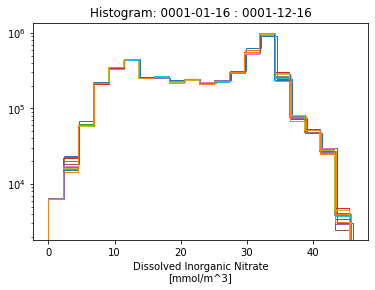

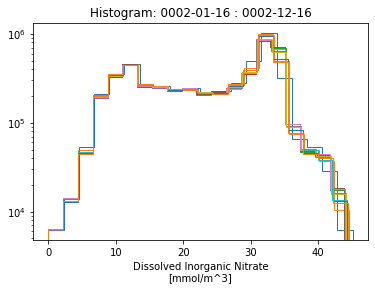

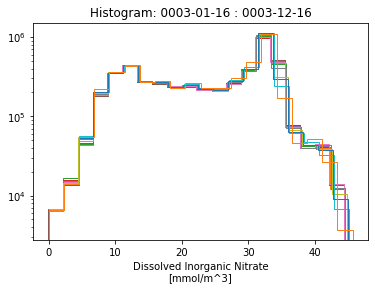

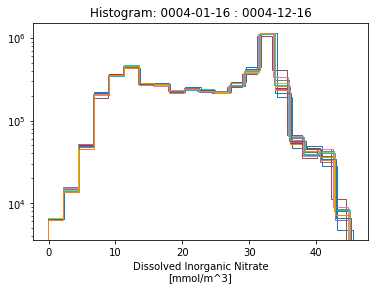

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
SiO3


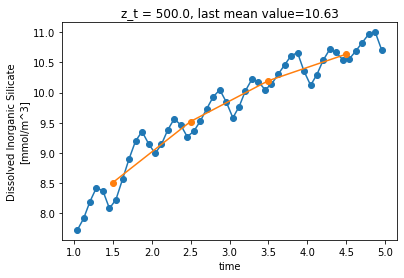

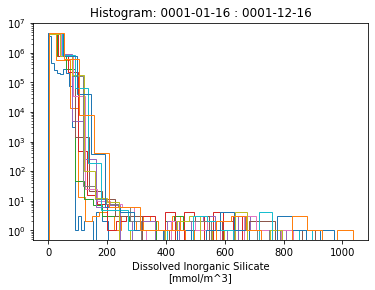

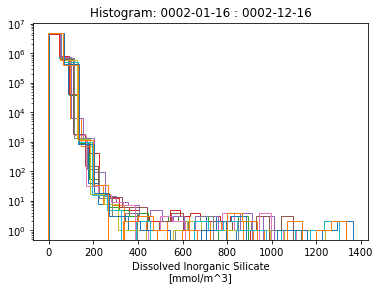

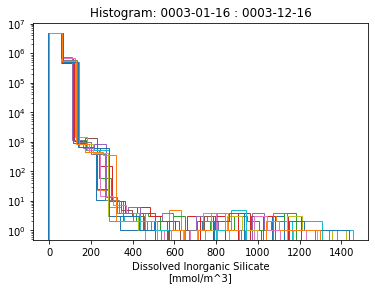

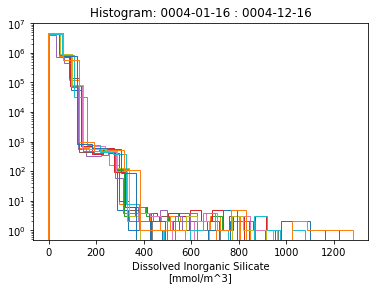

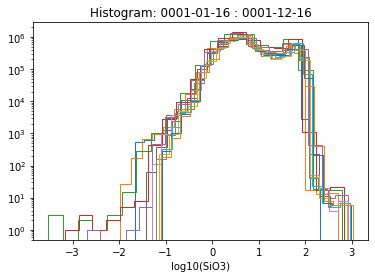

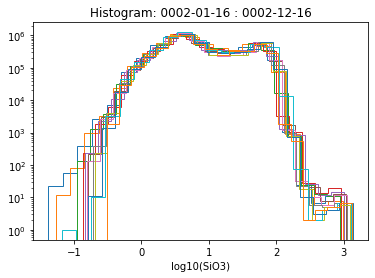

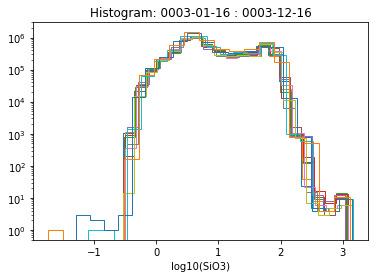

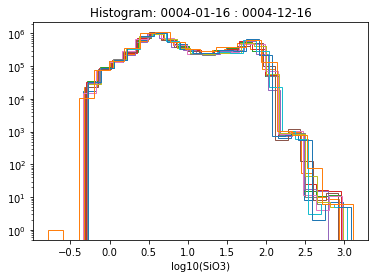

Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
SiO3


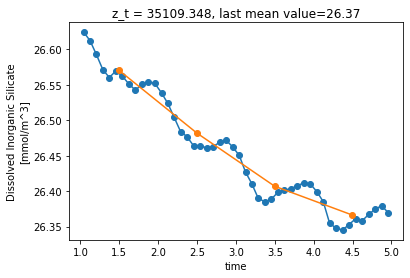

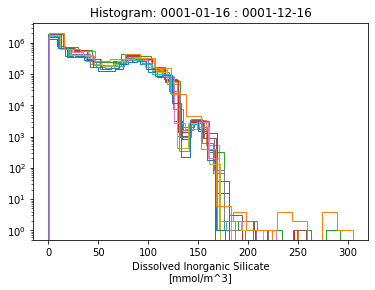

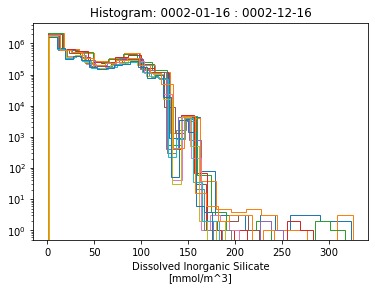

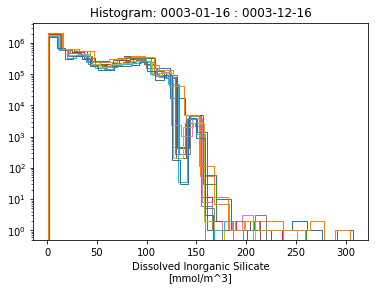

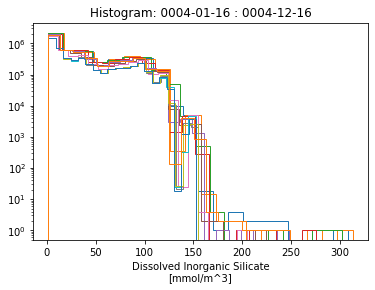

In [5]:
with dask.distributed.Client(cluster) as client:
    case = utils.CaseClass("g.e22.G1850ECO_JRA_HR.TL319_t13.003")
    stream = "pop.h"
    #     ds = case.gen_dataset(varnames, stream)
    for diag_metadata in diag_metadata_list:
        ds = case.gen_dataset(diag_metadata["varname"], stream)
        summary_plots(ds, diag_metadata)

In [6]:
cluster.close()